In [1]:
import sys
from datetime import datetime
import pickle
import pandas as pd
from KEMCE.dataset.data_labelling import LabelsForData
from KEMCE.utils import ConceptEvaluation
from random import sample 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import torch

In [2]:
data_path = '../outputs/gram/'
# torch.save(model, model_path)
# kame_model_file = data_path + 'model/ccs_single_level/mimic.gram_100_2020-09-11_19-56-34.model'
kame_model_file = data_path + 'models/mimic/dx1_lr_1.0_bs_32_epoch_20_ebd_200/gram_20_2020-09-22_01-25-15.model'
dict_file = data_path + 'data/mimic.types'
level2_file = data_path + 'data/mimic.level2.pk'
seqs_file = data_path + 'data/mimic.seqs'

In [4]:
dict_mimic = pickle.load(open(dict_file, 'rb'))
dict_mimic_inverse = {v:k for k, v in dict_mimic.items()}

In [3]:
kame_model = torch.load(kame_model_file)

/home/xpeng/anaconda3.7/envs/pytorch-1.4/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'GRAM.gram_module.GRAM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [4]:
kame_model

GRAM(
  (embed_init): Embedding(5548, 200)
  (dag_attention): DAGAttention(
    (linear1): Linear(in_features=400, out_features=200, bias=True)
    (linear2): Linear(in_features=200, out_features=1, bias=True)
  )
  (gru): GRUNet(
    (gru): GRU(200, 200, num_layers=2, batch_first=True, dropout=0.2)
    (fc): Linear(in_features=200, out_features=272, bias=True)
  )
)

In [7]:
sigle_dx_file = '../ccs/ccs_single_dx_tool_2015.csv'
multi_dx_file = '../ccs/ccs_multi_dx_tool_2015.csv'
label4data = LabelsForData(multi_dx_file, sigle_dx_file)

In [8]:
eval = ConceptEvaluation(dict_mimic_inverse, label4data)

In [9]:
x_2d, labels = eval.get_sample_tsne(kame_model.dag_emb.cpu().detach().numpy(), 2000)

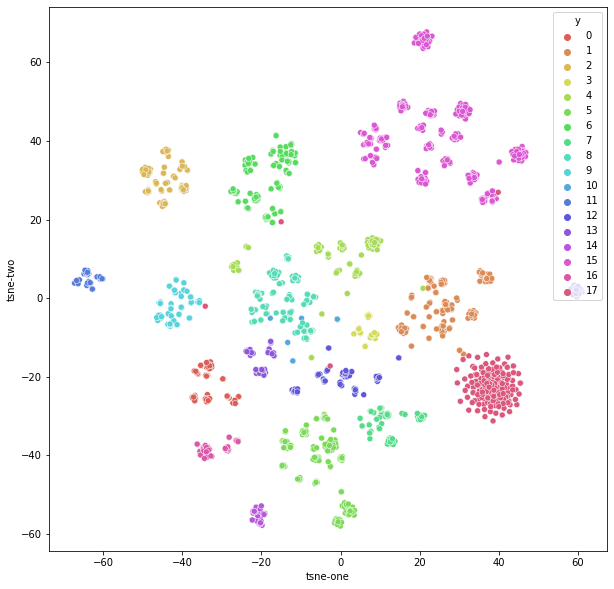

In [10]:
cms_df_subset={}
cms_df_subset['tsne-one'] = x_2d[:,0]
cms_df_subset['tsne-two'] = x_2d[:,1]
cms_df_subset['y'] = np.array(labels)
plt.figure(figsize=(10,10))
# ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 18),
    data=cms_df_subset,
#     legend="full",
    alpha=1,
#     ax=ax1
)

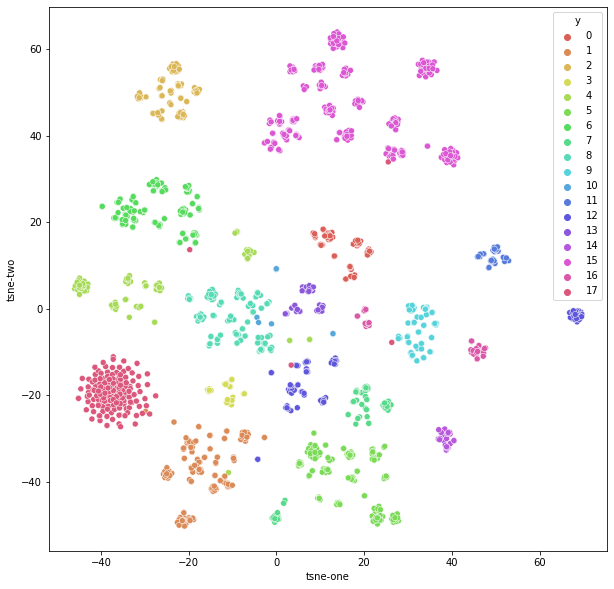

In [9]:
cms_df_subset={}
cms_df_subset['tsne-one'] = x_2d[:,0]
cms_df_subset['tsne-two'] = x_2d[:,1]
cms_df_subset['y'] = np.array(labels)
plt.figure(figsize=(10,10))
# ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 18),
    data=cms_df_subset,
#     legend="full",
    alpha=1,
#     ax=ax1
)